<a href="https://colab.research.google.com/github/edisonmoy/textualism/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering word embeddings
Using different dimensionality reduction and clustering methods, see how the model's word embeddings perform. This is testing on Alex and Javed's first gensim word2vec *model.model*

Dimensionality reduction methods:
- PCA
- t-SNE
- UMAP

Clustering methods:
- HDBSCAN
- K-means


# Load model & sanity checks

In [50]:
# Load model
import os
from google.colab import drive
from gensim.models import Word2Vec
drive.mount('/content/drive', force_remount=True)

model = Word2Vec.load("drive/My Drive/Textualism/JudgyVec/model.model")

Mounted at /content/drive


In [2]:
# Sanity check: compare similarity of words

import numpy as np
from tabulate import tabulate
import pandas as pd

y = ['man', 'woman', 'organic']
x = ['her', 'him', 'she', 'his', 'president', 'judge', 'innocent', 'guilty', 'win', 'lose']

data = []
for i in x:
  row = []
  for j in y:
    row.append(model.wv.similarity(i,j))
  data.append(row)

df = pd.DataFrame(data, index=x, columns=y)
print("Cosine Similarity Matrix")
print(tabulate(df, headers=y, tablefmt='fancy_grid'))

Cosine Similarity Matrix
╒═══════════╤══════════╤══════════╤═══════════╕
│           │      man │    woman │   organic │
╞═══════════╪══════════╪══════════╪═══════════╡
│ her       │ 0.805048 │ 0.664788 │  0.542718 │
├───────────┼──────────┼──────────┼───────────┤
│ him       │ 0.725513 │ 0.476964 │  0.452717 │
├───────────┼──────────┼──────────┼───────────┤
│ she       │ 0.831154 │ 0.659339 │  0.469928 │
├───────────┼──────────┼──────────┼───────────┤
│ his       │ 0.473314 │ 0.315226 │  0.283574 │
├───────────┼──────────┼──────────┼───────────┤
│ president │ 0.568963 │ 0.449493 │  0.500153 │
├───────────┼──────────┼──────────┼───────────┤
│ judge     │ 0.743565 │ 0.699761 │  0.664122 │
├───────────┼──────────┼──────────┼───────────┤
│ innocent  │ 0.941387 │ 0.921002 │  0.823561 │
├───────────┼──────────┼──────────┼───────────┤
│ guilty    │ 0.920176 │ 0.834756 │  0.862848 │
├───────────┼──────────┼──────────┼───────────┤
│ win       │ 0.882374 │ 0.725859 │  0.705833 │
├───────────┼──

In [3]:
# Show most frequent words
num_high_freq_words = 100
print("Top %i most frequent words:" %num_high_freq_words)
print(model.wv.index2entity[:num_high_freq_words])

Top 100 most frequent words:
['the', 'of', 'to', '.', 'a', 'in', 'that', 'and', 'is', 'for', 'not', 'court', 'at', 'as', 'on', 'be', 'it', 'by', 'u.', 'an', 'or', 'v.', 'this', 'with', 'was', '\xa0\xa0\xa0', 'we', 'from', 'would', 'have', 'which', 'his', 'its', 'united', 'are', 'state', 'federal', 'states', 'see', 'but', 'under', 'no', 'has', 'any', 's.', 'district', 'case', 'he', 'if', 'because', 'had', 'whether', 'may', 'such', 'i', 'does', 'only', 's', 'when', 'also', 'appeals', 'other', 'congress', 'law', 'against', 'could', 'rule', 'our', 'their', 'must', 'act', 'courts', 'been', '\r', 'government', 'court’s', 'evidence', 'one', 'than', 'these', 'were', 'did', 'there', '…', 'respondent', 'they', 'foreign', 'circuit', 'claim', 'those', 'all', 'statute', 'amendment', 'should', 'do', 's.,', 'can', 'petitioner', 'so', 'action']


In [4]:
#!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


# Remove stopwords
stops = set(stopwords.words("english"))
stops -= {'she', 'her', 'hers', 'herself',"she's", 'he', 'him', 'his', 'himself'}
stops.update(['the', 'a', 'in', 'that', 'and', 'is', 'for', '\r' ,'…', 's.,', '\"', 'j.', '\xa0','e.g.,', 'id.', '$', '\'s', 's.\xa0c.', '\"the', 'at', 'as', 'on', 'be', 'it', 'by', 'u.', 'an', 'or', 'v.', 'this', 'with', 'of', '.', 'was', '\xa0\xa0\xa0', 'from', 'would','\t\t\t\t\t\t\t\t\tdavis','have','which', 'its', 'are', 's.', 'because', 'had', 'whether', 'may', 'such', 'does', 's' ,'also', 'when', 'could'])
print ("Stopwords in NLKT without the gendered pronouns:")
print(stops)

words = list(model.wv.vocab)

words_remove_list = []
for word in words:
    if word in stops:
        words_remove_list.append(word)

for word in words_remove_list:
    words.remove(word)

print("\nTop %i most frequent words without stopwords:" %num_high_freq_words)
out = []
for word in list(model.wv.index2entity):
  if word in words:
    out.append(word)
    if len(out) >= 100:
      print(out)
      break


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Stopwords in NLKT without the gendered pronouns:
{'e.g.,', 'ain', 'some', 'as', 'then', 'below', 'we', 'whom', 'there', '\xa0\xa0\xa0', 'above', 've', 'were', 's.,', "haven't", 'any', 'such', 'v.', 'has', 'both', 'ma', 'yourself', "shouldn't", 'those', 'myself', 'them', 'but', 'few', 'i', 'u.', 'once', 'more', 'only', 'could', 'because', 'wasn', 'needn', "'s", 'y', 'the', "that'll", "you'll", 'you', 'our', 'each', 'shan', 'ourselves', 'whether', 'shouldn', 'did', 'id.', 'out', 'other', 'nor', '\r', 'before', 'not', 'been', 'after', "aren't", 'in', 'aren', 'hasn', 'by', 'own', 'same', 'have', 'and', 're', 'me', 'll', 'to', 'that', 'so', 'all', 'these', 'until', 'haven', 'too', 's.', 'can', 'between', 'during', "shan't", 'itself', 'was', 'theirs', 'this', "weren't", 'am', 'off', 'a', "wasn't", 'weren', "wouldn't", 'be', 'hadn', 'also', '"', 'further', "mightn't", 'up', 'an', 'd'

# Dimensionality Reduction
Use dimensionality reduction methods to map word embeddings to 2-dimensions:
- PCA
- t-SNE
- UMAP

In [12]:
!pip install umap-learn
# !pip install MulticoreTSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as mcTSNE
from umap import UMAP
import time
import warnings
warnings.filterwarnings("ignore")

X = model[words]

# fit a 2d PCA model to the vectors
print("Fitting PCA to vectors... ", end="", flush="True")
start = time.time()
pca = PCA(n_components=2).fit_transform(X)
print("Done in %f seconds"%(time.time()-start))

# fit a 2d multicore t-SNE model to the vectors
print("Fitting multicore t-SNE to vectors... ", end="", flush="True")
start = time.time()
tsne = mcTSNE(n_components=2).fit_transform(X)
print("Done in %f seconds"%(time.time()-start))

#fit a 2d t-SNE model to the vectors
print("Fitting t-SNE to vectors... ", end="", flush="True")
start = time.time()
# tsne = TSNE(n_components=2).fit_transform(X)
print("Done in %f seconds"%(time.time()-start))


#fit a 2d UMAP model to the vectors
print("Fitting UMAP to vectors... ", end="", flush="True")
start = time.time()
umap = UMAP(n_components=2).fit_transform(X)
print("Done in %f seconds"%(time.time()-start))


Fitting PCA to vectors... Done in 0.528259 seconds
Fitting multicore t-SNE to vectors... Done in 1273.090404 seconds
Fitting t-SNE to vectors... Done in 0.000048 seconds
Fitting UMAP to vectors... Done in 41.181423 seconds


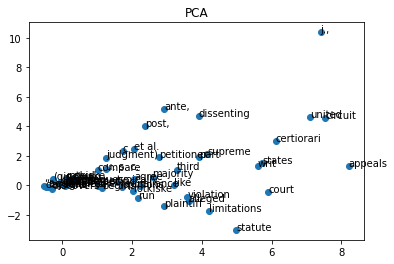

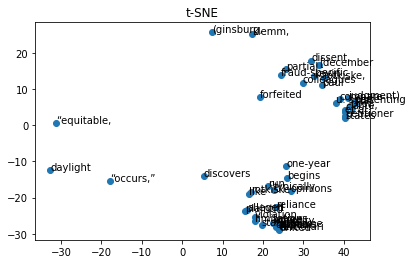

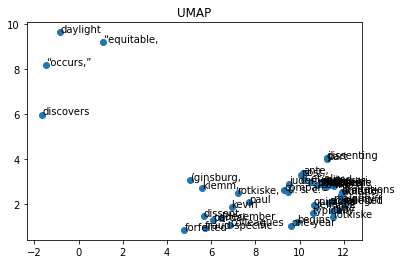

In [13]:
# create a scatter plot of the projection
import matplotlib.pyplot as plt
%matplotlib inline
limit = 50

for dr_tuple in [(pca, "PCA"), (tsne, "t-SNE"), (umap, "UMAP")]:
  dr_model, name = dr_tuple[0], dr_tuple[1]
  plt.scatter(dr_model[:limit, 0], dr_model[:limit, 1])
  plt.title(name)
  for i, word in enumerate(words[:limit]):
      plt.annotate(word, xy=(dr_model[i, 0], dr_model[i, 1]))
  plt.show()

### Dimensionality Reduction models on interesting words


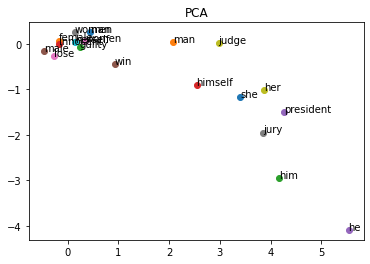

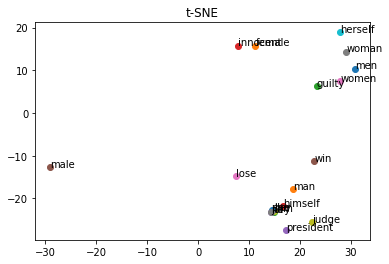

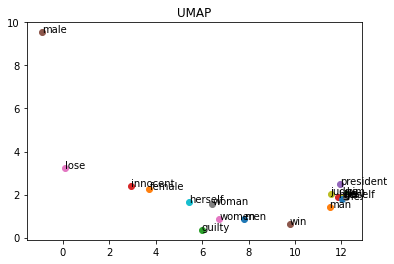

In [32]:
import matplotlib.pyplot as plt

# Model gendered and interesting words
interesting_words = ['men', 'man', 'him', 'himself', 'he', 'male', 'women', 'woman', 'her', 'herself', 'she', 'female', 'guilty', 'innocent', 'president','win', 'lose', 'jury', 'judge']

for dr_tuple in [(pca, "PCA"), (tsne, "t-SNE"), (umap, "UMAP")]:
  dr_model, name = dr_tuple[0], dr_tuple[1]
  plt.title(name)
  for word in interesting_words:
      x = dr_model[words.index(word), 0]
      y = dr_model[words.index(word), 1]
      plt.scatter(x,y)
      plt.annotate(word, xy=(x,y))
  plt.show()

# HDBSCAN
Unsupervised learning to find density based clusters.

In [36]:
!pip install hdbscan
import hdbscan
import seaborn as sns
import matplotlib.pyplot as plt

#Choose dimensionality reduction model [pca, tsne, umap]
model_in_use = pca

# Result mapping on first LIMIT word embeddings
result = model_in_use[:limit]

#Run HDBSCAN on mapping on first LIMIT words

sns.set_context('paper')
sns.set_style('whitegrid')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(result)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=True, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

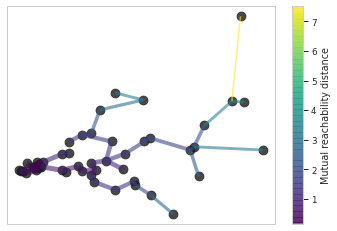

In [37]:
# Create MST
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=1.6)

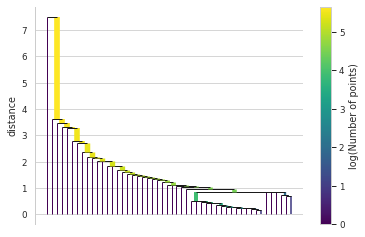

In [38]:
# Create cluster hierarchy
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

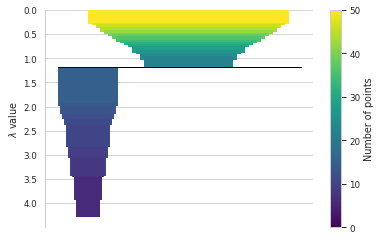

In [39]:
# Condense cluster tree
clusterer.condensed_tree_.plot()

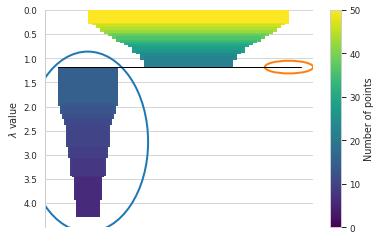

In [40]:
# Highlight clusters
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

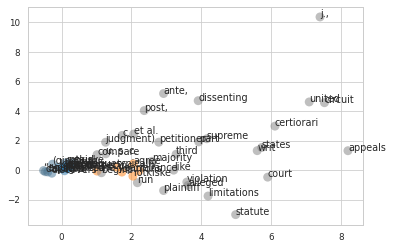

In [42]:
# Group clusters by color
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col % 10], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(result.T[0], result.T[1], c=cluster_colors, **plot_kwds)
for i, word in enumerate(words[:limit]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

# K-means Clustering
Find a specified k number of centers where all points are clustered to the nearest center, minimizing total distance from centers.

In [43]:
#Choose dimensionality reduction model [pca, tsne, umap]
model_in_use = pca

# Result mapping on first LIMIT word embeddings
result = model_in_use[:limit]

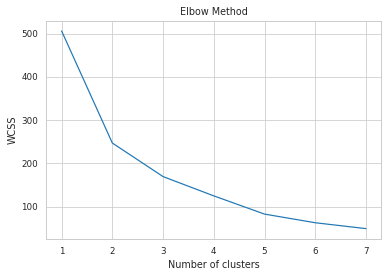

In [44]:
# Use Elbow Method to find number of clusters

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(result)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

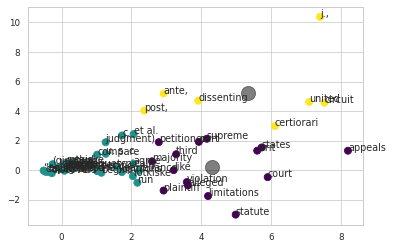

k-means clustering with 3 clusters


In [45]:
# Number of clusters
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(result)

plt.scatter(result[:, 0], result[:, 1], c=pred_y, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
for i, word in enumerate(words[:limit]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

print("k-means clustering with %d clusters" % num_clusters)

#Gaussian Mixture Models
Representation of a Gaussian mixture model probability distribution. This class allows to estimate the parameters of a Gaussian mixture distribution.



GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)


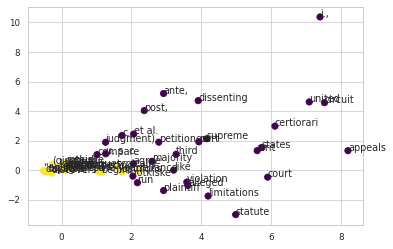

In [47]:
#!pip install sklearn.mixture
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=2).fit(result)
print(gmm)
labels = gmm.predict(result)
plt.scatter(result[:, 0], result[:, 1], c=labels, s=40, cmap='viridis');
for i, word in enumerate(words[:limit]):
  plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


# Gender Bias Analysis
Use clustering and similarity metrics to analyze gender bias in Supreme Court Opinions.

- Create femininity vector based on the average of several "feminine" word embeddings.

### Find feminine words
Based off of several 'seed' words, find other feminine words that have closest cosine distances

In [51]:
import IPython
import random
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

def similar_vec(vec_list, indices):
  """ Create table of ten most similar words for each word in word_list """
  i = 0
  data = []
  past_words ={''}
  for vec in vec_list:
    row = []
    for j in model.most_similar(positive=[vec], topn=10):
      similar_word = j[0]
      # Remove non alphabetic characters
      alphanumeric_filter = filter(str.isalpha, similar_word)
      similar_word = "".join(alphanumeric_filter)
      # Track for words that appear multiple times
      if similar_word in past_words:
        multiple_appearances.add((similar_word, i))
        i += 1
      else:
        past_words.add(similar_word)
      row.append(similar_word)
    data.append(row)
  df = pd.DataFrame(data, index=indices).transpose()
  df = df.style.applymap(color_matching_words)
  return df


def color_matching_words(val):
  colors = ["pink","green", "orange", "red", "blue", "purple"]
  color = "black"
  for i,v in multiple_appearances:
    if i == val:
      color = colors[v % len(colors)]
      break
  return 'color: %s' % color

def similar_words(word_list):
  return similar_vec([model[x] for x in word_list], word_list)


feminine_words = ['women', 'woman', 'her', 'herself', 'she', 'female']

print("Cosine Similarity: \'Feminine\' words")
multiple_appearances = {("", "")}
IPython.display.HTML(similar_words(feminine_words).render())

Cosine Similarity: 'Feminine' words


,women,woman,her,herself,she,female
0,women,woman,her,herself,she,female
1,standards,red,retrieved,retail,alvarado,francisco
2,clergy,pastoral,him,davis,banning,gifted
3,contracts,private,hanson,purchase,twice,objections
4,war,lawyer,drugs,inspections,bockmiller,cooperative
5,incumbent,ibid,conductedfootnote,virginia,claimant,distributing
6,christopher,doubtful,witnesses,hand,lawyer,institutionalization
7,terminated,under,banning,complaint,he,lenders
8,unnecessarily,familiar,corrective,crisisthat,retrieved,academically
9,entering,judicious,anyone,concern,iq,cerebral


In [52]:
masculine_words = ['men', 'man', 'him', 'himself', 'he', 'male']

print("Cosine Similarity: \'Masculine\' words")
multiple_appearances = {("", "")}
IPython.display.HTML(similar_words(masculine_words).render())

Cosine Similarity: 'Masculine' words


,men,man,him,himself,he,male
0,men,man,him,himself,he,male
1,kidnapping,prosecutor,her,being,she,debtor
2,timeconsuming,unlawful,himself,jurors,wound,amendmentprotected
3,battles,score,them,officers,fact,practicability
4,yes,once,arrest,paid,banks,secede
5,butte,narrowly,seizing,creditors,acquit,impacts
6,modifications,telling,officers,attorneys,twice,creditors
7,whitehead,accompanied,debtor,compensation,her,isolate
8,businesses,going,lied,registered,knew,claim
9,successive,house,fees,documents,disagree,promulgate


### Create femininity vector
Average the word embeddings of the feminine words to create femininty vector. 

In [53]:
def average_vector(word_list):
  vector = np.zeros(model[word_list[0]].shape)
  print(model)
  for word in word_list:
    vector += model[word]
  vector /= len(word_list)
  return vector

masculinity_vector = average_vector(masculine_words)
femininity_vector = average_vector(feminine_words)

data = model.most_similar(positive=[femininity_vector], topn=10)
pd.DataFrame(data, columns=["Top feminine words", "Cosine similarity"])

Word2Vec(vocab=25538, size=200, alpha=0.025)
Word2Vec(vocab=25538, size=200, alpha=0.025)


,Top feminine words,Cosine similarity
0,her,0.971501
1,retrieved,0.968278
2,banning,0.960604
3,hanson,0.956296
4,she,0.950203
5,alvarado,0.947227
6,sabri,0.940161
7,lawyer,0.938414
8,expenditure,0.935600
9,"premises,",0.934099


In [54]:
data = model.most_similar(positive=[masculinity_vector], topn=10)
pd.DataFrame(data, columns=["Top masculine words", "Cosine similarity"])


,Top masculine words,Cosine similarity
0,her,0.945081
1,she,0.934577
2,he,0.930813
3,him,0.930660
4,bockmiller,0.923747
5,banning,0.919008
6,retrieved,0.918256
7,officers,0.908649
8,testimony,0.906431
9,farr,0.905855


In [55]:
multiple_appearances = {("", "")}
fem_vecs = [model[x] for x in feminine_words]
fem_vecs.append(femininity_vector)
feminine_words.append("fem_avg")
IPython.display.HTML(similar_vec(fem_vecs, feminine_words).render())

,women,woman,her,herself,she,female,fem_avg
0,women,woman,her,herself,she,female,her
1,standards,red,retrieved,retail,alvarado,francisco,retrieved
2,clergy,pastoral,him,davis,banning,gifted,banning
3,contracts,private,hanson,purchase,twice,objections,hanson
4,war,lawyer,drugs,inspections,bockmiller,cooperative,she
5,incumbent,ibid,conductedfootnote,virginia,claimant,distributing,alvarado
6,christopher,doubtful,witnesses,hand,lawyer,institutionalization,sabri
7,terminated,under,banning,complaint,he,lenders,lawyer
8,unnecessarily,familiar,corrective,crisisthat,retrieved,academically,expenditure
9,entering,judicious,anyone,concern,iq,cerebral,premises


In [56]:
multiple_appearances = {("", "")}
mas_vecs = [model[x] for x in masculine_words]
mas_vecs.append(femininity_vector)
masculine_words.append("mas_avg")
IPython.display.HTML(similar_vec(mas_vecs, masculine_words).render())

,men,man,him,himself,he,male,mas_avg
0,men,man,him,himself,he,male,her
1,kidnapping,prosecutor,her,being,she,debtor,retrieved
2,timeconsuming,unlawful,himself,jurors,wound,amendmentprotected,banning
3,battles,score,them,officers,fact,practicability,hanson
4,yes,once,arrest,paid,banks,secede,she
5,butte,narrowly,seizing,creditors,acquit,impacts,alvarado
6,modifications,telling,officers,attorneys,twice,creditors,sabri
7,whitehead,accompanied,debtor,compensation,her,isolate,lawyer
8,businesses,going,lied,registered,knew,claim,expenditure
9,successive,house,fees,documents,disagree,promulgate,premises
